##### [ 이미지 처리 - 이진화 임계값 ]
- 이미지를 특정 기준 값으로 픽셀값을 나누는 것
- 0과 1(255)로 나눈 경우 <U>**이진화**</U>할고 함!

[1] 모듈로딩 및 데이터 준비<hr>

In [1]:
## [1-1] 모듈로딩
import cv2 
import numpy as np
import matplotlib.pyplot as plt 


[2] 바이너리 이미지 만들기 <hr>

127.0


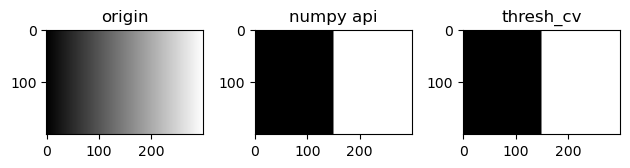

In [5]:
## 데이터 준비 
img = cv2.imread('../Data/Image/gray_gradient.jpg')

## numpy 연산으로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)
thresh_np[img>127] = 255

## opencv함수로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

## 원본과 결과 출력
imgs = {"origin" : img, 'numpy api' : thresh_np, 'thresh_cv' : thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,3, i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks(); plt.yticks()
    
plt.tight_layout()
plt.show()

[3] 이미지 최적의 임계값(threshold) 찾기 

In [6]:
## 스캔 이미지
data_file = '../Data/Image/scaned_paper.jpg'

## 이미지 로딩
scanImg = cv2.imread(data_file, cv2.IMREAD_GRAYSCALE)



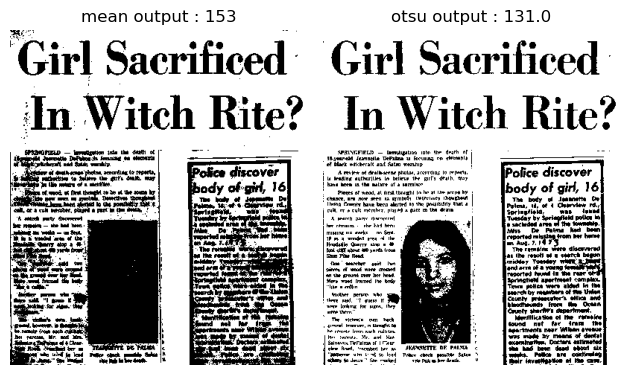

In [19]:
## 최적의 이미지 추출 임계값
THRESHOLD = round(scanImg.mean())

_, outimg = cv2.threshold(scanImg, THRESHOLD, 255, cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(outimg, cmap='gray')
plt.axis(False)
plt.title(f'mean output : {THRESHOLD}')


t, outimg2 = cv2.threshold(scanImg, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(1,2,2)
plt.imshow(outimg2, cmap='gray')
plt.title(f'otsu output : {t}')
plt.axis(False)
plt.tight_layout()
plt.show()


[4] 이미지 영역별 스레시홀드 적용 (적응형 스레시홀드 적용) <hr>

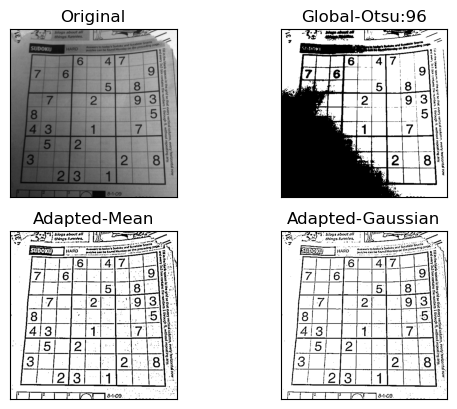

In [21]:
blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('../Data/Image/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()